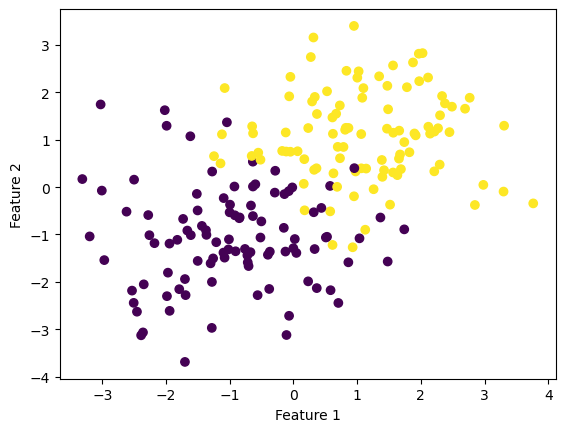

In [30]:
from solutions import LogisticRegression # your source code
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

[ 2.02283949  2.4936402  -0.19646585]


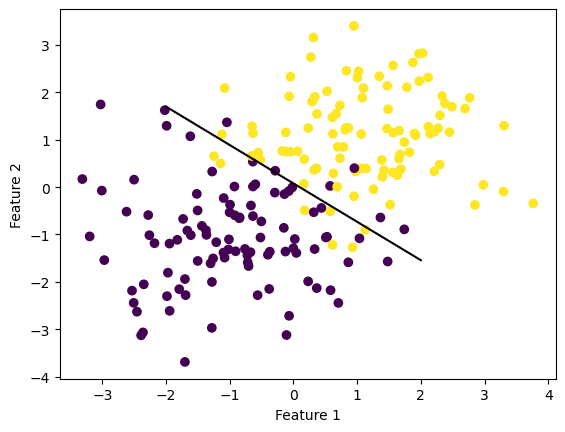

In [31]:
LR = LogisticRegression()
LR.fit(X, y, alpha = 0.1, max_epochs = 1000)

LR.fit_stochastic(X, y, max_epochs = 1000, batch_size=10, alpha=0.1)

def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

# inspect the fitted value of w
LR.w 
print(LR.w)
fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
fig = draw_line(LR.w, -2, 2)

## Illustration

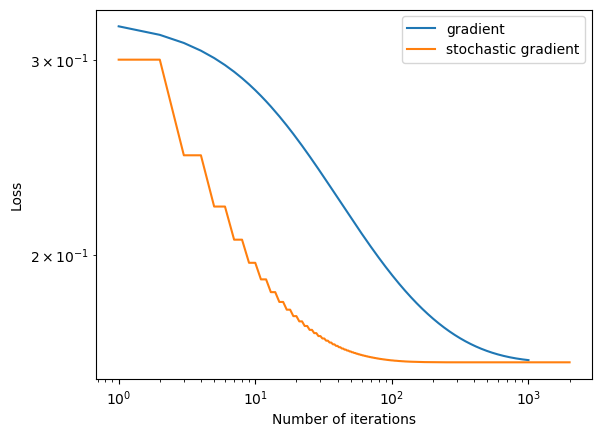

In [32]:
num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

num_steps = len(LR.loss_history_st)
plt.plot(np.arange(num_steps) + 1, LR.loss_history_st, label = "stochastic gradient")

plt.loglog()

legend = plt.legend() 
xlab = plt.xlabel("Number of iterations")
ylab = plt.ylabel("Loss")

In the above plot, we can see that the curve representing stoachastic converges to the minimum loss much faster than the curve representing the gradient. This suggests that our algorithm for stochastic descent is significantly more efficient.

# Experiments

### A case in which gradient descent does not converge to a minimizer because the learning rate is too large.



[10.24485182  4.74297034 -2.46438443]


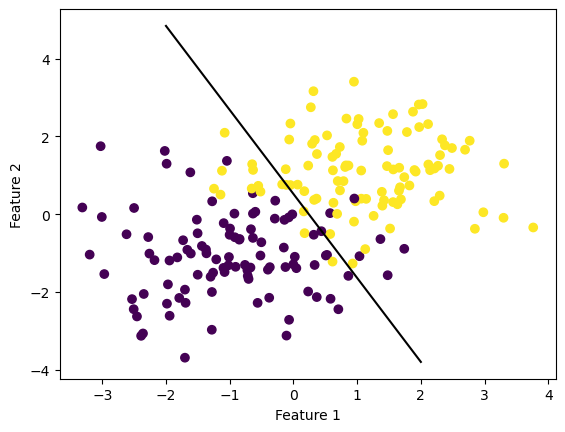

In [33]:
LR_e1 = LogisticRegression()
LR_e1.fit(X, y, alpha = 100, max_epochs = 1000)


# inspect the fitted value of w
LR_e1.w 
print(LR_e1.w)
fig2 = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

fig2 = draw_line(LR_e1.w, -2, 2)

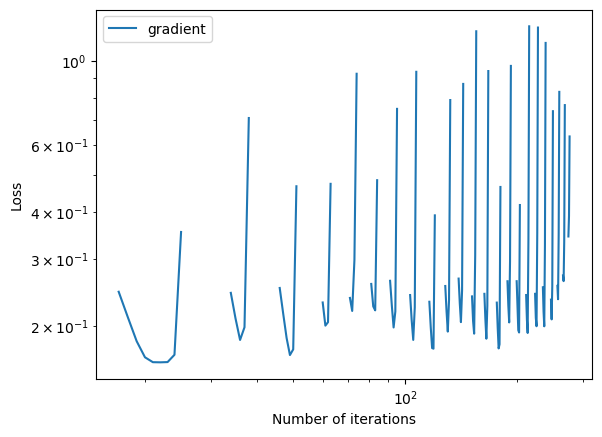

In [36]:
num_steps = len(LR_e1.loss_history)
plt.plot(np.arange(num_steps) + 1, LR_e1.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend() 
xlab = plt.xlabel("Number of iterations")
ylab = plt.ylabel("Loss")

As the above loss history chart shows, with a sufficiently high learning rate, which, in our case is 100, our algorithm is no longer able to converge to the minimum loss. A converging loss function would always have a negative slope. The curve (curves?) above have positive as well as negative slopes, suggesting that the loss decreases and increrases with increasing iterations.

### A case in which the choice of batch size influences how quickly the algorithm converges.

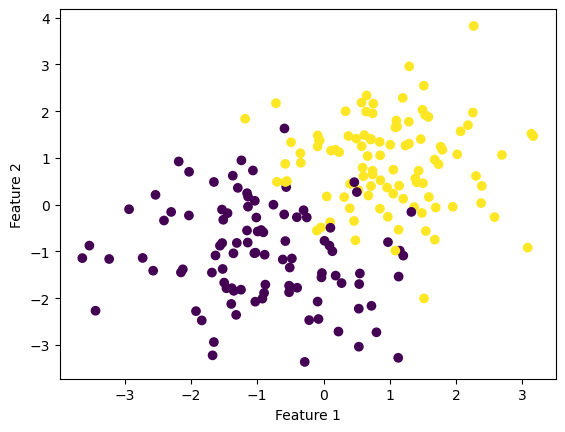

In [8]:
LR_e2i = LogisticRegression()
LR_e2ii = LogisticRegression()
LR_e2iii = LogisticRegression()
LR_e2iv = LogisticRegression()
LR_e2v = LogisticRegression()
LR_e2vi = LogisticRegression()
LR_e2vii = LogisticRegression()


LR_e2i.fit_stochastic(X, y, max_epochs = 1000, batch_size=5, alpha=0.1)
LR_e2ii.fit_stochastic(X, y, max_epochs = 1000, batch_size=10, alpha=0.1)
LR_e2iii.fit_stochastic(X, y, max_epochs = 1000, batch_size=20, alpha=0.1)
LR_e2iv.fit_stochastic(X, y, max_epochs = 1000, batch_size=40, alpha=0.1)
LR_e2v.fit_stochastic(X, y, max_epochs = 1000, batch_size=60, alpha=0.1)
LR_e2vi.fit_stochastic(X, y, max_epochs = 1000, batch_size=80, alpha=0.1)
LR_e2vii.fit_stochastic(X, y, max_epochs = 1000, batch_size=100, alpha=0.1)

# inspect the fitted value of w
LR_e2i.w 
fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

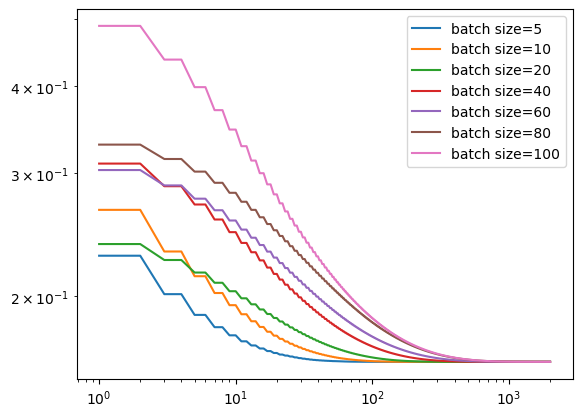

In [9]:
num_steps = len(LR_e2i.loss_history_st)
plt.plot(np.arange(num_steps) + 1, LR_e2i.loss_history_st, label = "batch size=5")

num_steps = len(LR_e2ii.loss_history_st)
plt.plot(np.arange(num_steps) + 1, LR_e2ii.loss_history_st, label = "batch size=10")

num_steps = len(LR_e2iii.loss_history_st)
plt.plot(np.arange(num_steps) + 1, LR_e2iii.loss_history_st, label = "batch size=20")

num_steps = len(LR_e2iv.loss_history_st)
plt.plot(np.arange(num_steps) + 1, LR_e2iv.loss_history_st, label = "batch size=40")

num_steps = len(LR_e2v.loss_history_st)
plt.plot(np.arange(num_steps) + 1, LR_e2v.loss_history_st, label = "batch size=60")

num_steps = len(LR_e2vi.loss_history_st)
plt.plot(np.arange(num_steps) + 1, LR_e2vi.loss_history_st, label = "batch size=80")

num_steps = len(LR_e2vii.loss_history_st)
plt.plot(np.arange(num_steps) + 1, LR_e2vii.loss_history_st, label = "batch size=100")

plt.loglog()

legend = plt.legend() 

### A case in which gradient descent does not converge to a minimizer because the learning rate is too large. In at least one of these experiments, generate some synthetic data (it’s fine to use make_blobs) for data of at least 10 feature dimensions.

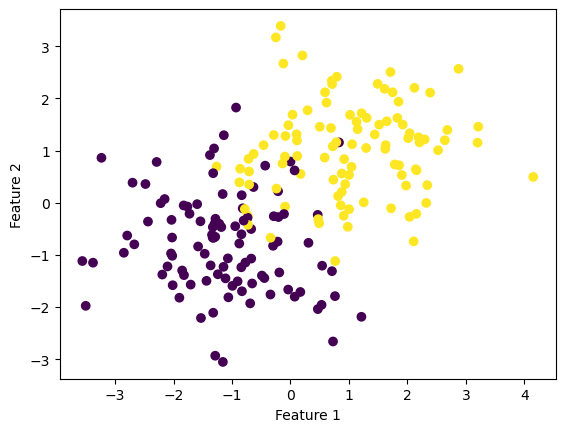

In [39]:
p_features = 10
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

LR = LogisticRegression()
LR.fit(X, y, alpha = 0.1, max_epochs = 1000)

LR2= LogisticRegression()
LR2.fit(X, y, alpha = 100, max_epochs = 1000)

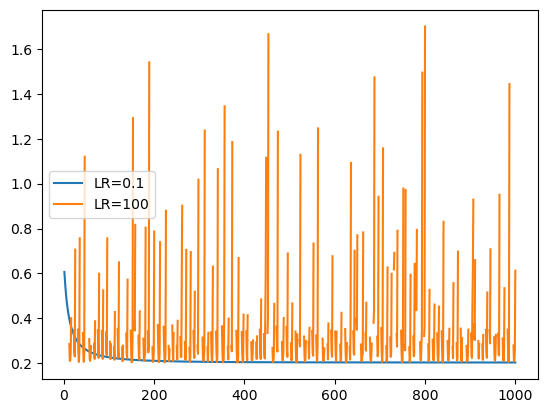

In [41]:
num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "LR=0.1")
plt.plot(np.arange(num_steps) + 1, LR2.loss_history, label = "LR=100")
#plt.loglog()

legend = plt.legend() 

As we can observe, our inference about the impact of a sufficiently high learning rate also holds true for examples with 10 features. The blue curve, representing a learning rate of 0.1 uniformly converges to the minimum loss for our regression. The orange curve does not converge to any value, and fluctuates with increasing and decreasing loss values for all iterations.